In [2]:
# imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.python.layers.core import Dropout

In [3]:
# import data
data = pd.read_csv("data.csv")

# EDA

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [6]:
data.dtypes.isnull()

,0
Age,False
Sex,False
ChestPainType,False
RestingBP,False
Cholesterol,False
FastingBS,False
RestingECG,False
MaxHR,False
ExerciseAngina,False
Oldpeak,False


In [7]:
data.describe(include = "object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [8]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
data.duplicated(keep=False).value_counts()

,count
False,918


## Encoding

In [10]:
label_encoder = LabelEncoder()
categorical_encode = data.select_dtypes(include=['object']).columns.tolist()
for column in categorical_encode:
    data[column] = label_encoder.fit_transform(data[column].astype(str))
    print(f"Unique values in {column} Encoded: {np.sort(data[column].unique())}")

data_after_encoding = data.copy()
data.head()

Unique values in Sex Encoded: [0 1]
Unique values in ChestPainType Encoded: [0 1 2 3]
Unique values in RestingECG Encoded: [0 1 2]
Unique values in ExerciseAngina Encoded: [0 1]
Unique values in ST_Slope Encoded: [0 1 2]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


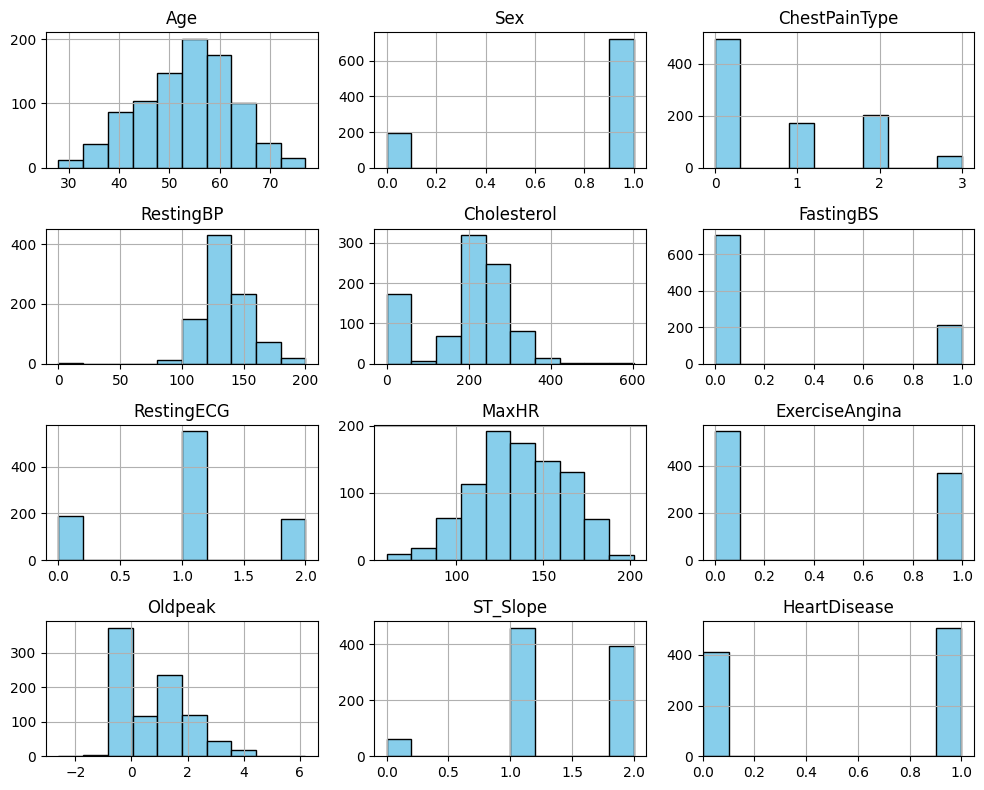

In [11]:
data.hist(figsize=(10, 8), bins=10, color='skyblue', edgecolor='black')
plt.xlim(left=0)
plt.tight_layout()
plt.show()

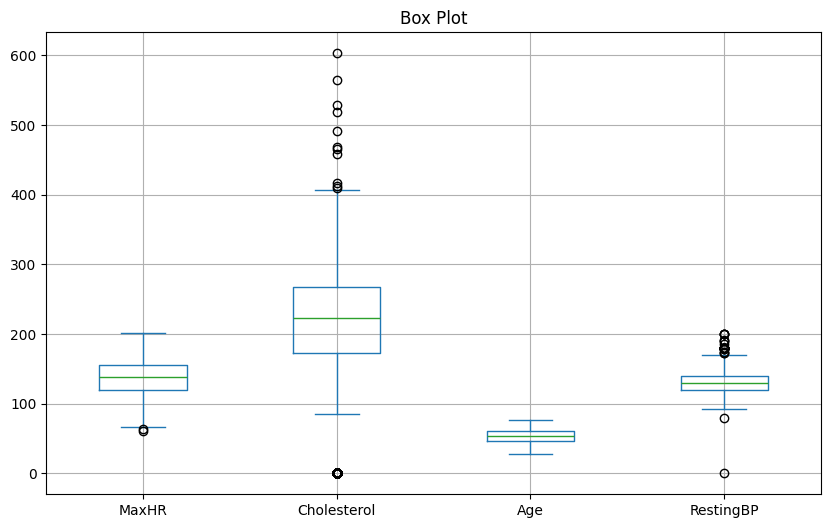

In [12]:
numerical_columns = ['MaxHR', 'Cholesterol', 'Age', 'RestingBP']
data[numerical_columns].plot(kind='box', figsize=(10, 6), grid=True)
plt.title("Box Plot")
plt.show()

In [19]:
# Converting age into bins representing different age groups
data['AgeGroups'] = pd.qcut(data['Age'], q=4, labels=[1, 2, 3, 4])
data.drop(['Age'], axis=1, inplace=True)
data = data[data['Cholesterol'] != 0]

KeyError: 'Age'

In [18]:
# Replacing cholesterol levels of zero with the median of this column
# avg_cholesterol = data['Cholesterol'].replace(0, pd.NA).median()
# data['Cholesterol'] = data['Cholesterol'].replace(0, avg_cholesterol)
#data = data[data['Cholesterol'] != 0]

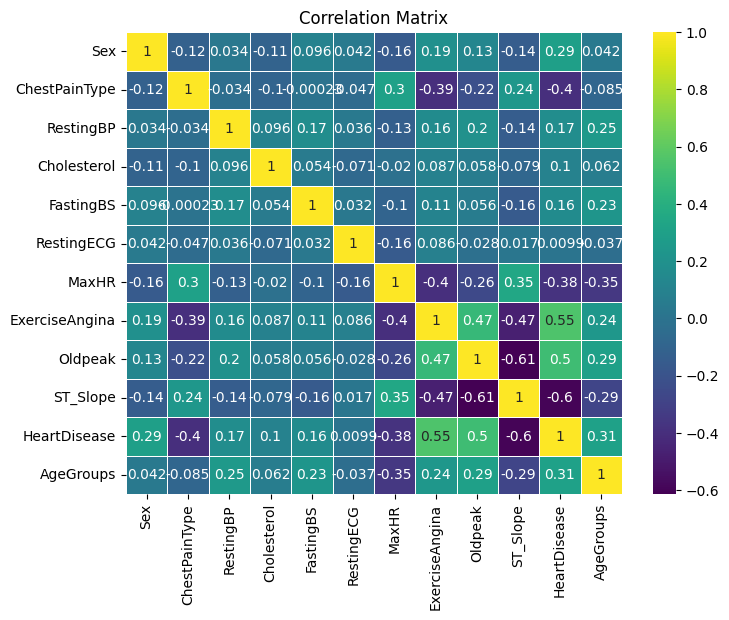

In [22]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Data Split

In [23]:
data_preprocessed = data.copy()
Y = data.pop('HeartDisease')
data_preprocessed.head()

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroups
0,1,1,140,289,0,1,172,0,0.0,2,0,1
1,0,2,160,180,0,1,156,0,1.0,1,1,2
2,1,1,130,283,0,2,98,0,0.0,2,0,1
3,0,0,138,214,0,1,108,1,1.5,1,1,2
4,1,2,150,195,0,1,122,0,0.0,2,0,2


In [24]:
# Scaling
def standardize(df, scaler, columns_to_scale=None, is_test=False):
    if columns_to_scale is None:
        columns_to_scale = ['RestingBP', 'Cholesterol', 'MaxHR']
    if is_test:
        df[columns_to_scale] = scaler.transform(df[columns_to_scale])
    else:
        df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    # print(df.shape)
    # print(df.head())
    return df, scaler

In [25]:
def split_data(data, Y, scaling=True):
    X_train_val, X_test, y_train_val, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
    if scaling:
        starter_scaler = StandardScaler()
        X_train_scaled, scaler = standardize(X_train, scaler=starter_scaler, is_test=False)
        X_val_scaled, _ = standardize(X_val, scaler=scaler, is_test=True)
        X_test_scaled, _ = standardize(X_test, scaler=scaler, is_test=True)
        return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test
    return X_train, X_val, X_test, y_train, y_val, y_test

# ML Model

Accuracy: 0.8466666666666667
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        71
           1       0.88      0.82      0.85        79

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



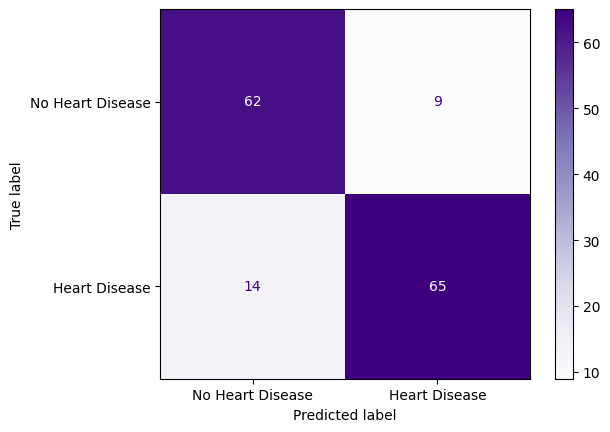

In [26]:
# Split data
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data, Y)
# Definition & train
regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)
y_pred_regression = regression_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_regression))
print(classification_report(y_test, y_pred_regression))
cm_reg= confusion_matrix(y_test, y_pred_regression)
disp_reg = ConfusionMatrixDisplay(confusion_matrix=cm_reg, display_labels=["No Heart Disease", "Heart Disease"])
disp_reg.plot(cmap='Purples')

# Neural Network

In [27]:
# imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from keras import Input
from tensorflow.keras import backend as K

In [28]:
def plot_results(history):
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    # Plot the losses
    plt.figure(figsize=(8, 6))
    plt.plot(training_loss, label='Training Loss', color='blue', linewidth=2)
    plt.plot(validation_loss, label='Validation Loss', color='orange', linewidth=2)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

In [29]:
def plot_confusion_matrix(model, X_test, y_test, threshold=0.5):
    y_pred_probs = model.predict(X_test)
    prob_pred = (y_pred_probs > threshold).astype(int)
    cm = confusion_matrix(y_test, prob_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Heart Disease", "Heart Disease"])
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"Confusion Matrix")
    plt.xticks(rotation=45)
    plt.show()

In [30]:
def create_model(num_neurons, activation_func_name, learning_rate, X_train, X_val, X_test, y_train, y_val, y_test):
    K.clear_session()
    # Define model
    model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Use Input layer instead of input_shape in Dense
    Dense(num_neurons, activation=activation_func_name),
    Dense(1, activation='sigmoid')
    ])
    # Compile model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
            loss='binary_crossentropy',
            metrics=['accuracy'])
    # Train model
    history = model.fit(X_train, y_train,
                  validation_data=(X_val, y_val),
                  epochs=50, batch_size=32)
    # Evaluate
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    plot_results(history)
    plot_confusion_matrix(model, X_test, y_test)

### Basic Network

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5686 - loss: 0.8654 - val_accuracy: 0.6376 - val_loss: 0.6666
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6748 - loss: 0.6563 - val_accuracy: 0.7047 - val_loss: 0.5519
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7309 - loss: 0.5501 - val_accuracy: 0.7651 - val_loss: 0.5030
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7356 - loss: 0.5275 - val_accuracy: 0.8121 - val_loss: 0.4809
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7630 - loss: 0.4844 - val_accuracy: 0.8255 - val_loss: 0.4658
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8029 - loss: 0.4696 - val_accuracy: 0.8322 - val_loss: 0.4524
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8269 - loss: 0.4183 - val_accuracy: 0.8456 - val_loss: 0.4419
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8220 - loss: 0.4207 - val_accuracy: 0.8389 - val_los

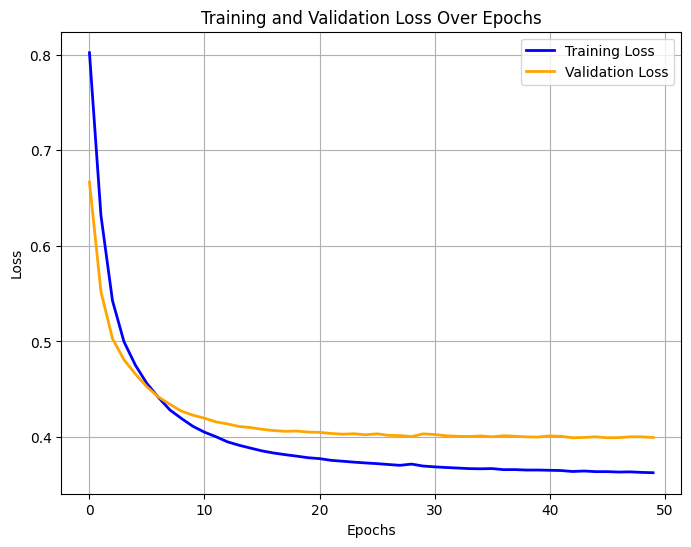

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


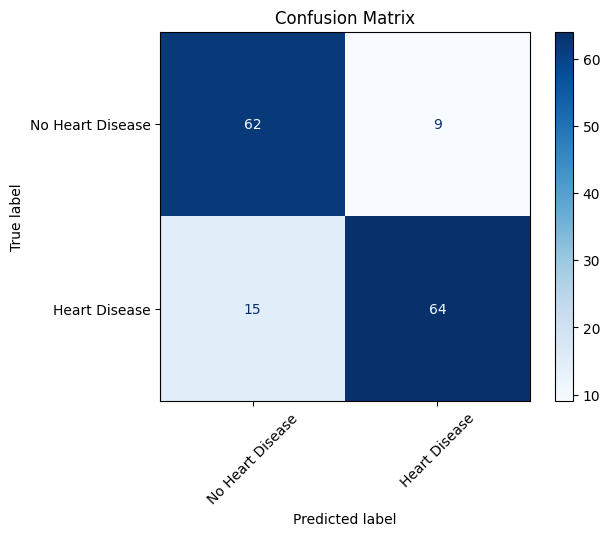

In [31]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data, Y)
create_model(16, None, 0.001, X_train, X_val, X_test, y_train, y_val, y_test)

# Experiments with Hyperparameter

## Hyperparameter - Learning Rate

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5035 - loss: 0.8568 - val_accuracy: 0.8121 - val_loss: 0.4739
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8031 - loss: 0.4796 - val_accuracy: 0.8389 - val_loss: 0.4339
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8230 - loss: 0.3879 - val_accuracy: 0.8389 - val_loss: 0.4225
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8355 - loss: 0.3976 - val_accuracy: 0.8456 - val_loss: 0.4099
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8565 - loss: 0.3596 - val_accuracy: 0.8322 - val_loss: 0.4061
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8353 - loss: 0.3979 - val_accuracy: 0.8255 - val_loss: 0.4045
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8236 - loss: 0.3715 - val_accuracy: 0.8255 - val_loss: 0.4105
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8601 - loss: 0.3459 - val_accuracy: 0.8389 - val_loss

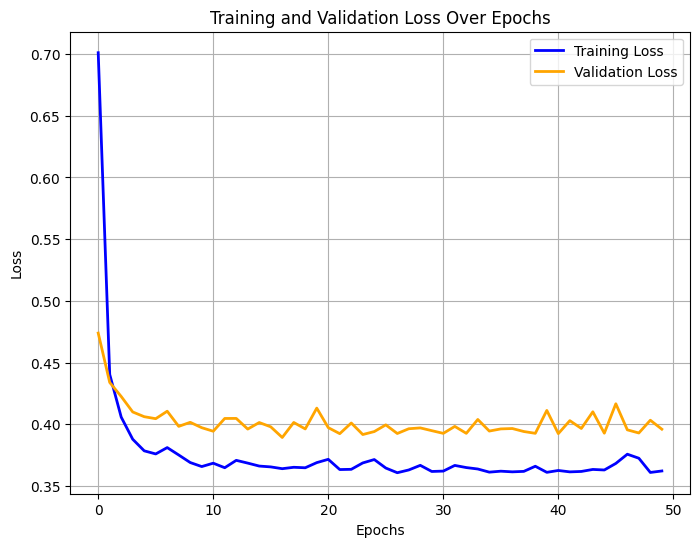

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


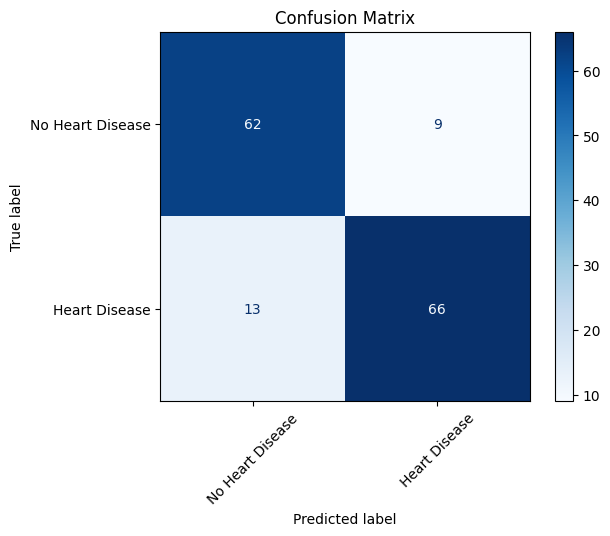

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6016 - loss: 0.8121 - val_accuracy: 0.8591 - val_loss: 0.4420
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8480 - loss: 0.4204 - val_accuracy: 0.8255 - val_loss: 0.4156
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8444 - loss: 0.4048 - val_accuracy: 0.8054 - val_loss: 0.4808
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8251 - loss: 0.4665 - val_accuracy: 0.7517 - val_loss: 0.4791
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8409 - loss: 0.4086 - val_accuracy: 0.8322 - val_loss: 0.4025
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8647 - loss: 0.3423 - val_accuracy: 0.8456 - val_loss: 0.3951
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8574 - loss: 0.3256 - val_accuracy: 0.8322 - val_loss: 0.4010
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8343 - loss: 0.4016 - val_accuracy: 0.8456 - val_loss

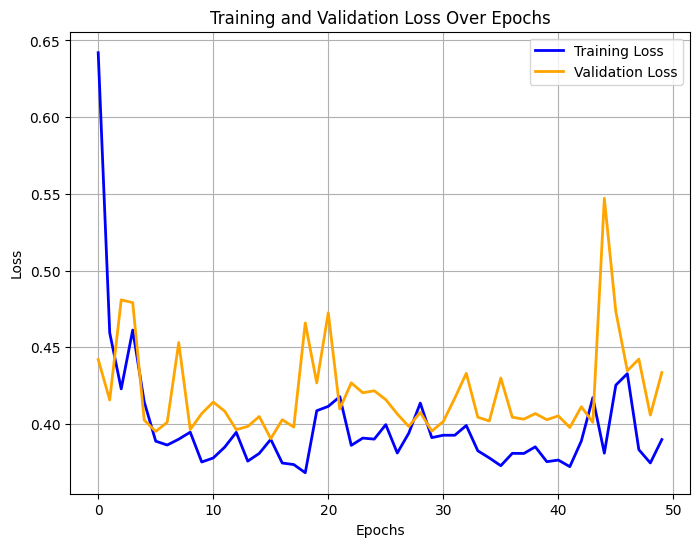

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


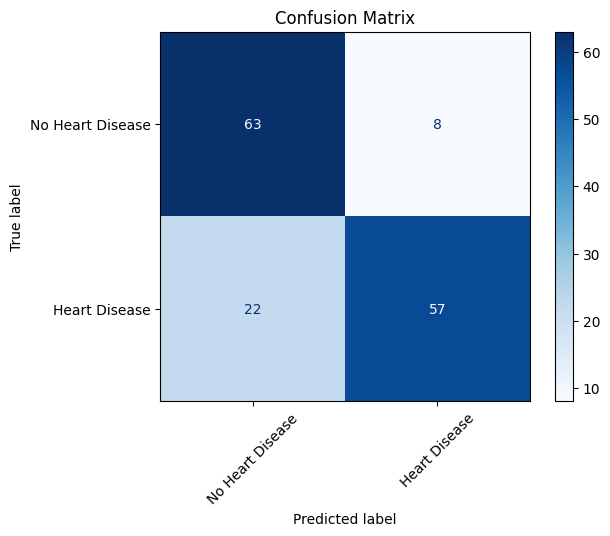

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6704 - loss: 0.6534 - val_accuracy: 0.8322 - val_loss: 0.4735
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8164 - loss: 0.4597 - val_accuracy: 0.8255 - val_loss: 0.4327
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8227 - loss: 0.4101 - val_accuracy: 0.8389 - val_loss: 0.4239
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8350 - loss: 0.3689 - val_accuracy: 0.8255 - val_loss: 0.4112
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8265 - loss: 0.3693 - val_accuracy: 0.8389 - val_loss: 0.4148
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8566 - loss: 0.3380 - val_accuracy: 0.8188 - val_loss: 0.4037
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8433 - loss: 0.3668 - val_accuracy: 0.8389 - val_loss: 0.4155
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8362 - loss: 0.3474 - val_accuracy: 0.8322 - val_los

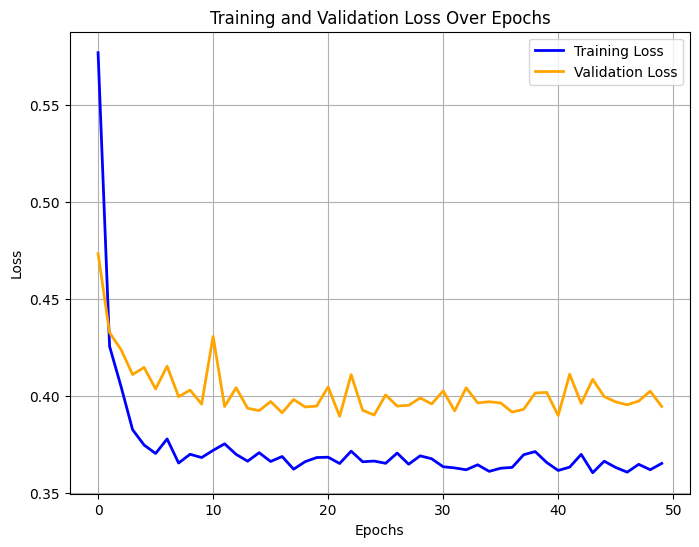

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


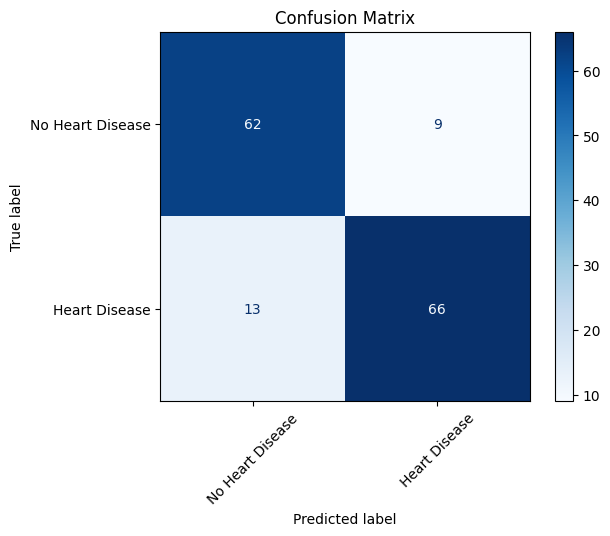

In [32]:
create_model(num_neurons=16, activation_func_name=None, learning_rate=0.01, X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)
create_model(num_neurons=16, activation_func_name=None, learning_rate=0.1, X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)
create_model(num_neurons=16, activation_func_name=None, learning_rate=0.01, X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)

## Hyperparameter - Number of Neurons

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4266 - loss: 0.8938 - val_accuracy: 0.7517 - val_loss: 0.5771
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7029 - loss: 0.5734 - val_accuracy: 0.8456 - val_loss: 0.4470
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7817 - loss: 0.4598 - val_accuracy: 0.8523 - val_loss: 0.4218
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8530 - loss: 0.3789 - val_accuracy: 0.8322 - val_loss: 0.4121
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8453 - loss: 0.3968 - val_accuracy: 0.8255 - val_loss: 0.4084
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8411 - loss: 0.3696 - val_accuracy: 0.8255 - val_loss: 0.4082
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3376 - val_accuracy: 0.8322 - val_loss: 0.4079
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8246 - loss: 0.3877 - val_accuracy: 0.8322 - val_los

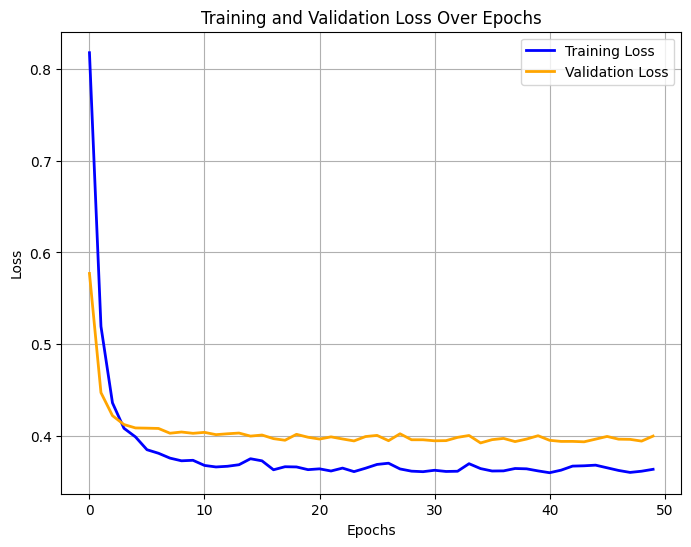

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


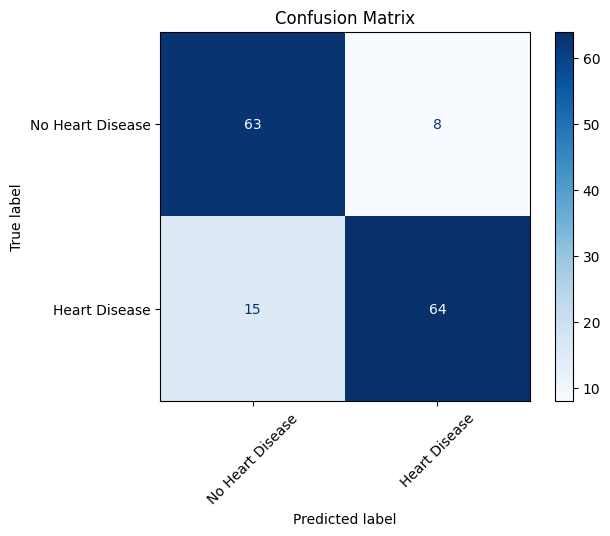

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6321 - loss: 0.6521 - val_accuracy: 0.8188 - val_loss: 0.4294
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8188 - loss: 0.4480 - val_accuracy: 0.8456 - val_loss: 0.4349
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8264 - loss: 0.4230 - val_accuracy: 0.8456 - val_loss: 0.4072
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8434 - loss: 0.3892 - val_accuracy: 0.8322 - val_loss: 0.4086
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8240 - loss: 0.3854 - val_accuracy: 0.8322 - val_loss: 0.4053
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8313 - loss: 0.3911 - val_accuracy: 0.8322 - val_loss: 0.3995
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8456 - loss: 0.3502 - val_accuracy: 0.8389 - val_loss: 0.3983
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8598 - loss: 0.3280 - val_accuracy: 0.8389 - val_lo

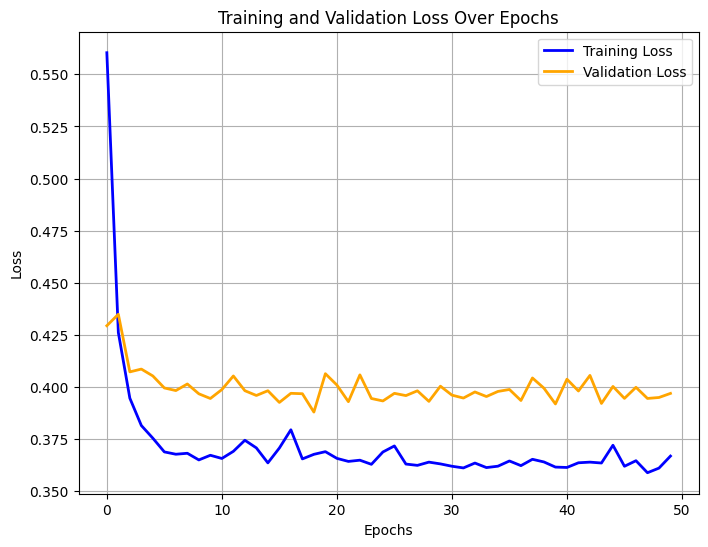

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


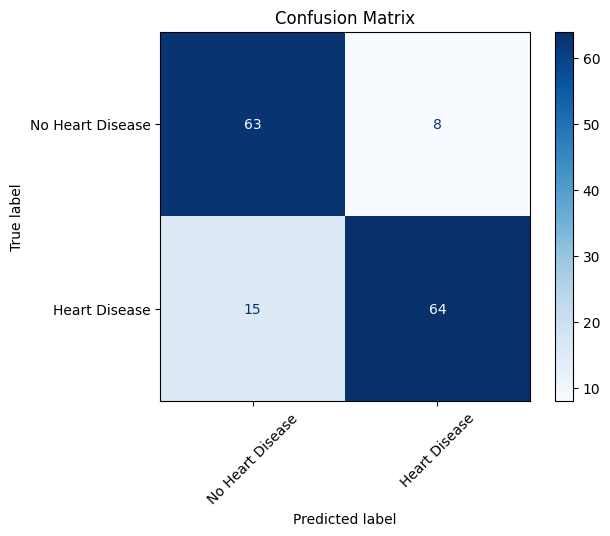

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7024 - loss: 0.5500 - val_accuracy: 0.8389 - val_loss: 0.4719
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8522 - loss: 0.3831 - val_accuracy: 0.7987 - val_loss: 0.4171
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8463 - loss: 0.3442 - val_accuracy: 0.8322 - val_loss: 0.4066
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8303 - loss: 0.3764 - val_accuracy: 0.8389 - val_loss: 0.3953
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8371 - loss: 0.3893 - val_accuracy: 0.8322 - val_loss: 0.4040
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8273 - loss: 0.3775 - val_accuracy: 0.8255 - val_loss: 0.3962
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8345 - loss: 0.3734 - val_accuracy: 0.8389 - val_loss: 0.3942
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8612 - loss: 0.3318 - val_accuracy: 0.8389 - va

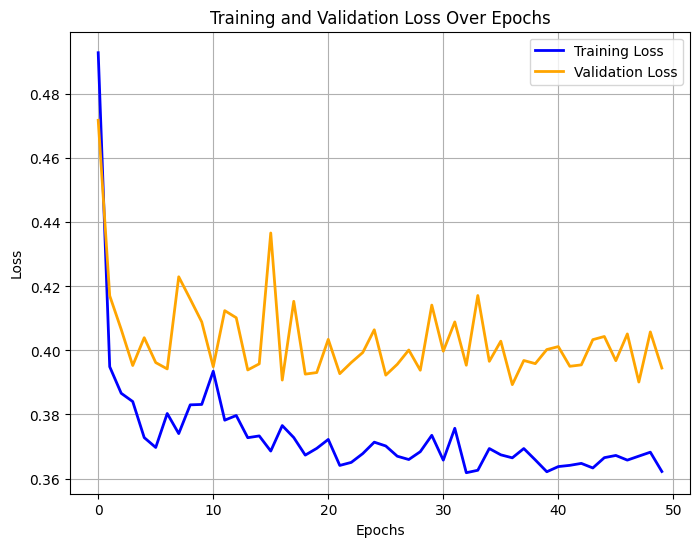

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


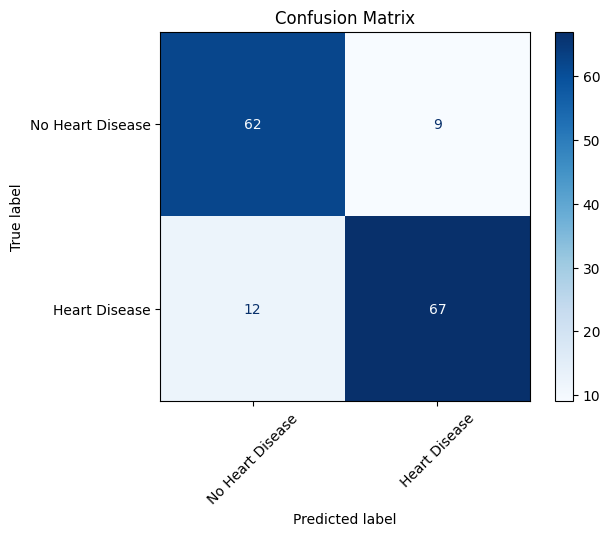

In [33]:
create_model(num_neurons=4, activation_func_name=None, learning_rate=0.01, X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)
create_model(num_neurons=16, activation_func_name=None, learning_rate=0.01, X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)
create_model(num_neurons=100, activation_func_name=None, learning_rate=0.01, X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)

## Hyperparameter - Activation Function

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7771 - loss: 0.5009 - val_accuracy: 0.8255 - val_loss: 0.4274
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8330 - loss: 0.4147 - val_accuracy: 0.8255 - val_loss: 0.4194
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8495 - loss: 0.3729 - val_accuracy: 0.8188 - val_loss: 0.4142
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8215 - loss: 0.3797 - val_accuracy: 0.8322 - val_loss: 0.4058
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8737 - loss: 0.3292 - val_accuracy: 0.8322 - val_loss: 0.4095
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8287 - loss: 0.3439 - val_accuracy: 0.8389 - val_loss: 0.3982
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8842 - loss: 0.3092 - val_accuracy: 0.8389 - val_loss: 0.3959
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8287 - loss: 0.3992 - val_accuracy: 0.8322 - val_los

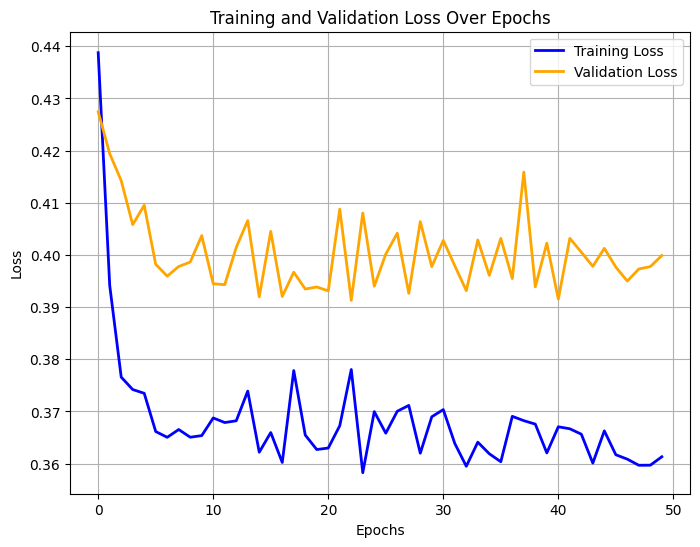

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


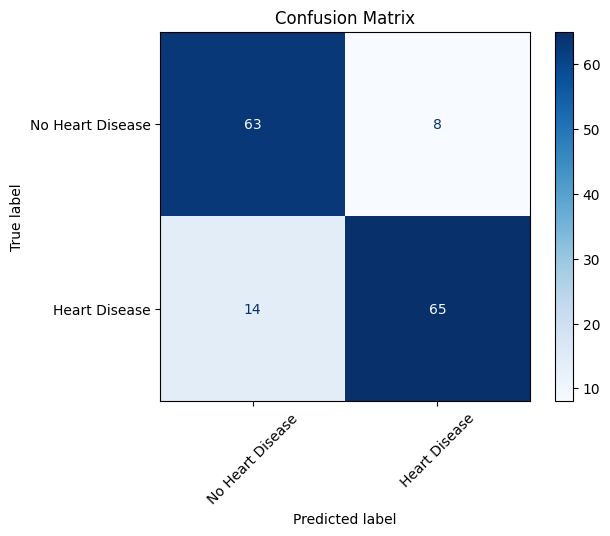

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5653 - loss: 0.6775 - val_accuracy: 0.7987 - val_loss: 0.4834
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7872 - loss: 0.4859 - val_accuracy: 0.8456 - val_loss: 0.4198
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8134 - loss: 0.4272 - val_accuracy: 0.8456 - val_loss: 0.4088
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8352 - loss: 0.3920 - val_accuracy: 0.8456 - val_loss: 0.3967
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8137 - loss: 0.4238 - val_accuracy: 0.8389 - val_loss: 0.3924
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8545 - loss: 0.3457 - val_accuracy: 0.8255 - val_loss: 0.3908
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8687 - loss: 0.3523 - val_accuracy: 0.8255 - val_loss: 0.3878
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8373 - loss: 0.3739 - val_accuracy: 0.8322 - val_l

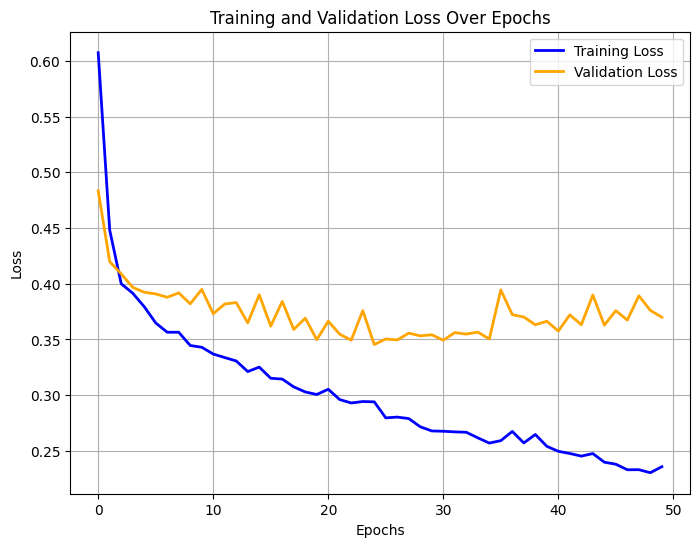

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


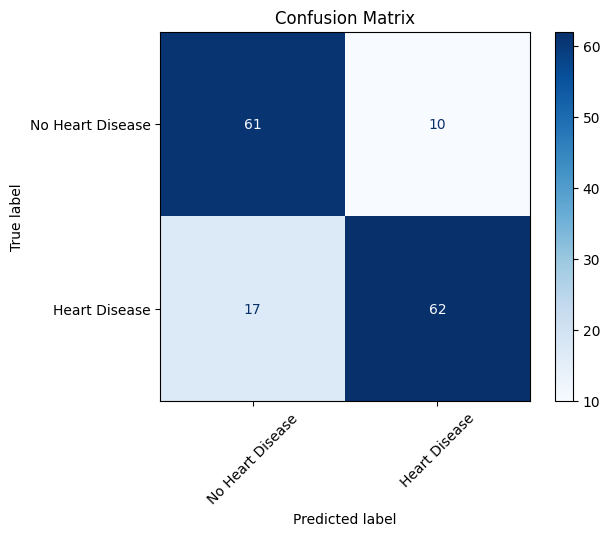

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6840 - loss: 0.5927 - val_accuracy: 0.8188 - val_loss: 0.4734
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8136 - loss: 0.4136 - val_accuracy: 0.8389 - val_loss: 0.4268
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8183 - loss: 0.4085 - val_accuracy: 0.8389 - val_loss: 0.4075
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8355 - loss: 0.3739 - val_accuracy: 0.8389 - val_loss: 0.3992
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8241 - loss: 0.3811 - val_accuracy: 0.8255 - val_loss: 0.3949
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8373 - loss: 0.3622 - val_accuracy: 0.8188 - val_loss: 0.3871
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8224 - loss: 0.3682 - val_accuracy: 0.8255 - val_loss: 0.3927
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8360 - loss: 0.3648 - val_accuracy: 0.8389 - val_loss

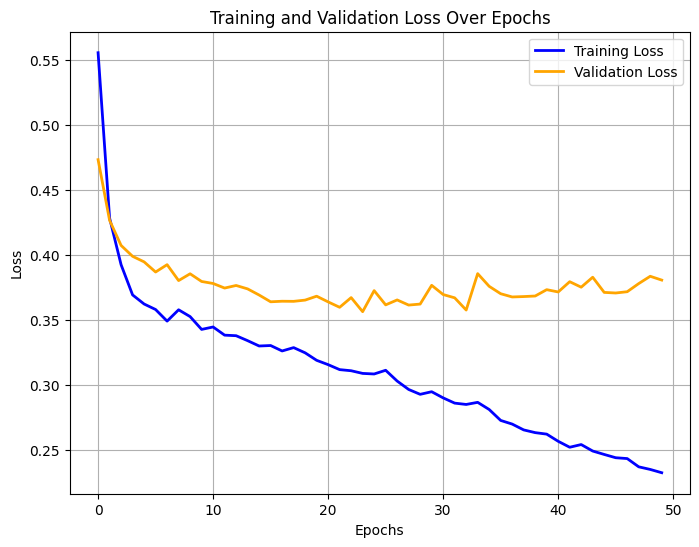

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


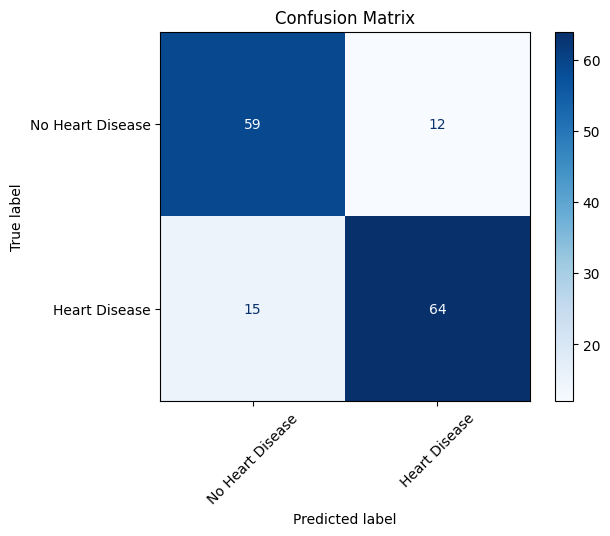

In [34]:
create_model(num_neurons=16, activation_func_name=None, learning_rate=0.01, X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)
create_model(num_neurons=16, activation_func_name='relu', learning_rate=0.01, X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)
create_model(num_neurons=16, activation_func_name='tanh', learning_rate=0.01, X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)

# Data Modifications Scenarios

## Improved Data Scenario

In [35]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1               # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [36]:
def balance_classes(df, column_name):
    min_count = df[column_name].value_counts().min()
    balanced_df = pd.concat([
        df[df[column_name] == val].sample(min_count, random_state=42)
        for val in df[column_name].unique()
    ])
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
    print(balanced_df[column_name].value_counts())
    return balanced_df

HeartDisease
1    356
0    356
Name: count, dtype: int64
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4047 - loss: 0.8685 - val_accuracy: 0.3433 - val_loss: 0.8196
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4000 - loss: 0.7855 - val_accuracy: 0.5075 - val_loss: 0.7145
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5250 - loss: 0.6965 - val_accuracy: 0.7015 - val_loss: 0.6436
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6659 - loss: 0.6360 - val_accuracy: 0.7239 - val_loss: 0.5865
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7244 - loss: 0.5884 - val_accuracy: 0.7761 - val_loss: 0.5473
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7500 - loss: 0.5541 - val_accuracy: 0.7910 - val_loss: 0.5188
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7695 - loss: 0.5292 - val_accuracy: 0.8134 - val_loss: 0.4923
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accurac

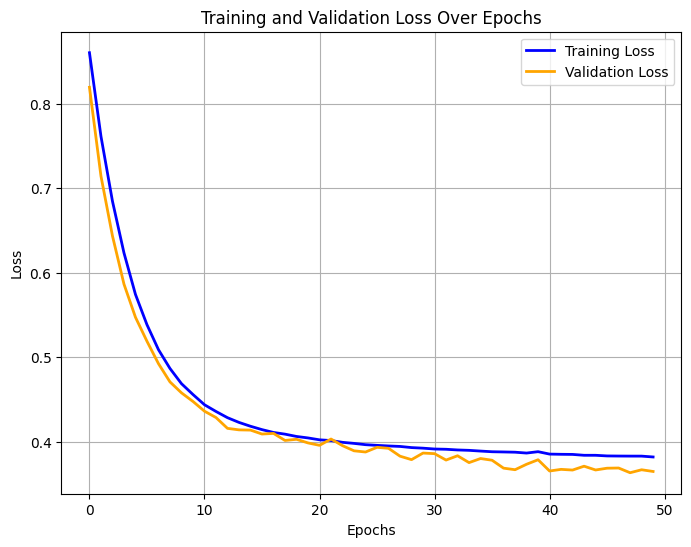

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


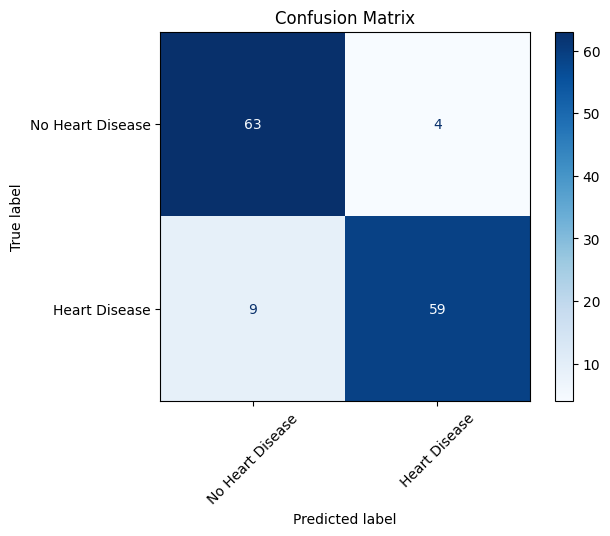

In [37]:
# Reloading data
data_improved = data_preprocessed.copy()
# Additional pre-process
balanced_data_improved = balance_classes(data_improved, 'HeartDisease')
data_improved_without_outliers = remove_outliers(balanced_data_improved, ['Cholesterol', 'RestingBP', 'MaxHR'])
Y_improved = data_improved_without_outliers.pop("HeartDisease")
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data_improved_without_outliers, Y_improved)
create_model(16, None, 0.001, X_train, X_val, X_test, y_train, y_val, y_test)

## Bad Data Scenario

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5578 - loss: 0.7517 - val_accuracy: 0.6242 - val_loss: 0.6711
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6224 - loss: 0.6573 - val_accuracy: 0.6577 - val_loss: 0.6455
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6402 - loss: 0.6472 - val_accuracy: 0.6913 - val_loss: 0.6219
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6957 - loss: 0.6008 - val_accuracy: 0.7315 - val_loss: 0.6019
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7100 - loss: 0.5643 - val_accuracy: 0.7315 - val_loss: 0.5849
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7420 - loss: 0.5690 - val_accuracy: 0.7315 - val_loss: 0.5705
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7098 - loss: 0.5686 - val_accuracy: 0.7584 - val_loss: 0.5567
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7723 - loss: 0.5154 - val_accuracy: 0.7785 - v

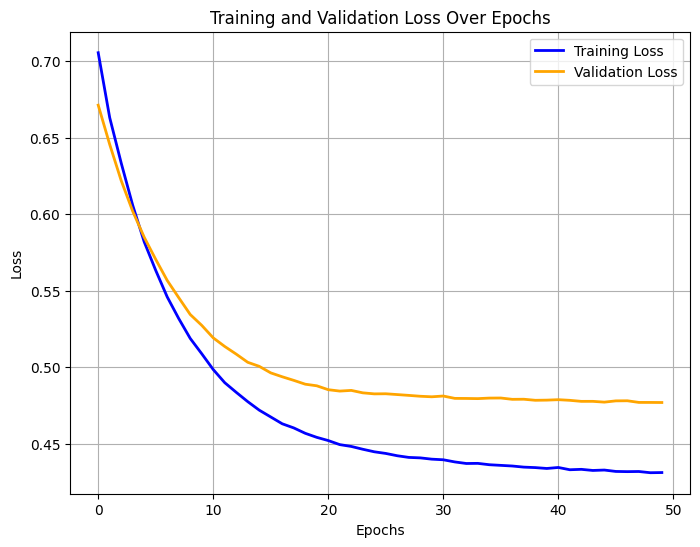

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


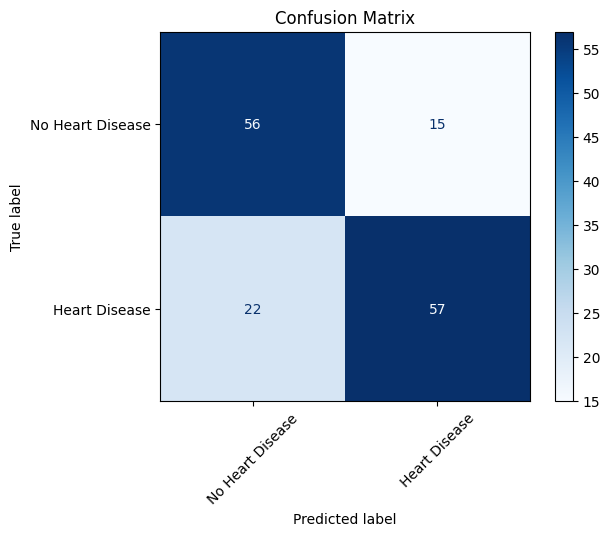

In [38]:
data_bad = data_preprocessed.copy()
data_bad.drop(["ST_Slope", "ChestPainType"], axis=1, inplace=True)
Y_bad = data_bad.pop("HeartDisease")
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data_bad, Y_bad)
create_model(16, None, 0.001, X_train, X_val, X_test, y_train, y_val, y_test)

# Improving Model Architecture

In [39]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, BatchNormalization
def create_improved_model(num_neurons, activation_func_name, learning_rate, X_train, X_val, X_test, y_train, y_val, y_test):
    K.clear_session()
    # Define model
    model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Use Input layer instead of input_shape in Dense
    Dense(num_neurons, activation=activation_func_name),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
    ])
    # Compile model
    model.compile(optimizer=Adam(learning_rate=learning_rate, weight_decay=0.01),
            loss='binary_crossentropy',
            metrics=['accuracy'])
    # Train model
    history = model.fit(X_train, y_train,
                  validation_data=(X_val, y_val),
                  epochs=40, batch_size=64)
    # Evaluate
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    plot_results(history)
    plot_confusion_matrix(model, X_test, y_test)

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5357 - loss: 0.7772 - val_accuracy: 0.6577 - val_loss: 0.5891
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7991 - loss: 0.4423 - val_accuracy: 0.7517 - val_loss: 0.5536
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8473 - loss: 0.3589 - val_accuracy: 0.7584 - val_loss: 0.5773
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8553 - loss: 0.3416 - val_accuracy: 0.7450 - val_loss: 0.6085
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8585 - loss: 0.3344 - val_accuracy: 0.7450 - val_loss: 0.5886
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8441 - loss: 0.3547 - val_accuracy: 0.7785 - val_loss: 0.5358
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8636 - loss: 0.3322 - val_accuracy: 0.7718 - val_loss: 0.5350
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8574 - loss: 0.3431 - val_accuracy: 0.7651 - val_loss: 0.5293


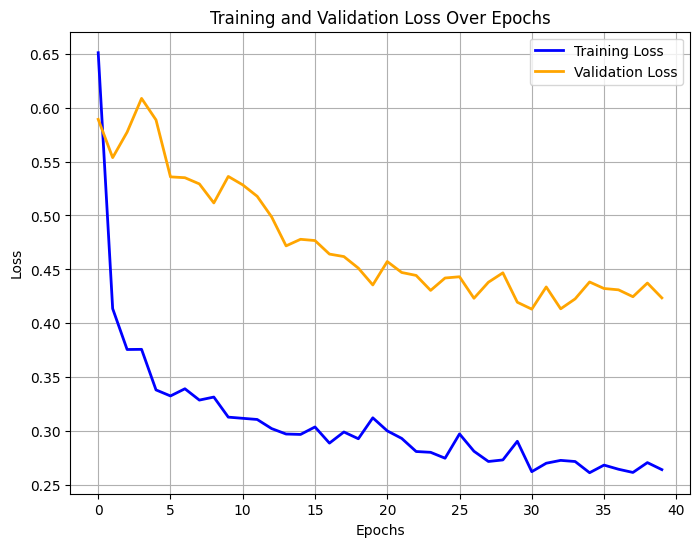

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


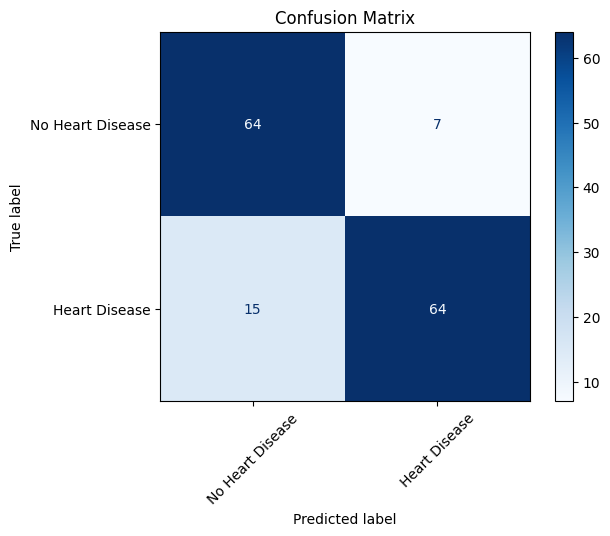

In [40]:
data_new = data_preprocessed.copy()
Y_new = data_new.pop("HeartDisease")
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data_new, Y_new)
create_improved_model(16, 'relu', 0.01, X_train, X_val, X_test, y_train, y_val, y_test)

# New Metric

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
import numpy as np

# Custom callback to track MCC
class MCCCallback(Callback):
    def __init__(self, X_val, y_val):
        self.X_val = X_val
        self.y_val = y_val
        self.mcc_scores = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred_probs = self.model.predict(self.X_val)
        y_pred = (y_pred_probs > 0.5).astype(int)
        mcc = matthews_corrcoef(self.y_val, y_pred)
        self.mcc_scores.append(mcc)
        print(f"Epoch {epoch+1}: MCC = {mcc:.4f}")

def nn_newMatric(neurons, func, learning_rate, X_train, X_val, X_test, y_train, y_val, y_test):
    K.clear_session()
    model = Sequential([
        Dense(neurons, activation=func, input_shape=(X_train.shape[1],)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Initialize MCC tracking
    mcc_callback = MCCCallback(X_val, y_val)

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=80, batch_size=32,
                        callbacks=[mcc_callback])  # Track MCC after each epoch

    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Extract loss values from the history object
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']

     # Plot MCC over epochs
    plt.figure(figsize=(8, 6))
    plt.plot(mcc_callback.mcc_scores, label='MCC Score', color='green', linewidth=2)
    plt.xlabel('Epochs')
    plt.ylabel('MCC')
    plt.title('MCC Score Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Predictions
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Compute final MCC
    final_mcc = matthews_corrcoef(y_test, y_pred)
    print(f"Final MCC: {final_mcc:.4f}")

Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Epoch 1: MCC = -0.0213
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5341 - loss: 0.9202 - val_accuracy: 0.5168 - val_loss: 0.8546
Epoch 2/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 2: MCC = -0.0124
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5472 - loss: 0.7944 - val_accuracy: 0.5168 - val_loss: 0.7799
Epoch 3/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Epoch 3: MCC = 0.0163
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5618 - loss: 0.7710 - val_accuracy: 0.5235 - val_loss: 0.7197
Epoch 4/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 4: MCC = 0.1442
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5766 - loss: 0.7011 - val_accuracy: 0.5705 - val_loss: 0.6716
Epoch 5/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 5: MCC = 0.3382
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5878 - loss: 0.6981 - val_accuracy: 0.6644 - val_loss: 0.6300
Epoch 6/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 6: MCC = 0.3879
14/

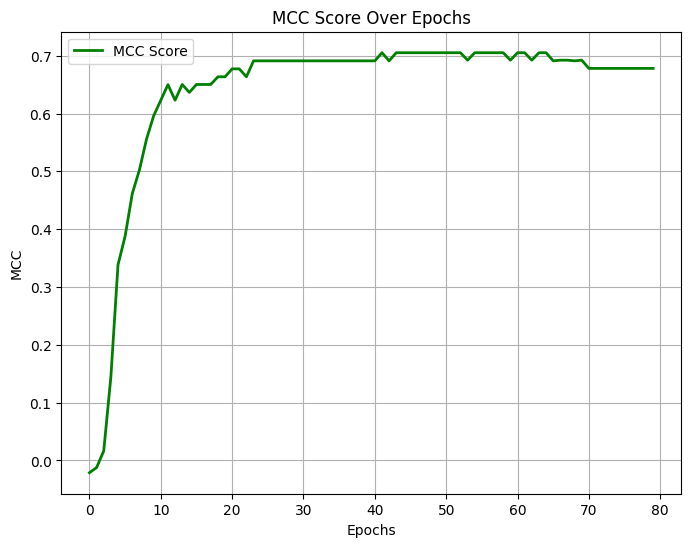

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Final MCC: 0.6703


In [42]:
data_new = data_preprocessed.copy()
Y_new = data_new.pop("HeartDisease")
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data_new, Y_new)
nn_newMatric(16, 'relu', 0.001, X_train, X_val, X_test, y_train, y_val, y_test)

# Unbalanced Data

In [43]:
import pandas as pd
from sklearn.utils import resample

cp_data = data_preprocessed.copy()
# Check the distribution of ChestPainType before balancing
print("Original Class Distribution:\n", cp_data["ChestPainType"].value_counts())

# Separate the dataset by ChestPainType category
df_0 = cp_data[cp_data["ChestPainType"] == 0]  # Most common class
df_1 = cp_data[cp_data["ChestPainType"] == 1]
df_2 = cp_data[cp_data["ChestPainType"] == 2]
df_3 = cp_data[cp_data["ChestPainType"] == 3]  # Least common class


max_size = df_0.shape[0]  # Majority class size
moderate_size = int(max_size * 0.7)  # Moderately balanced target size
full_size = max_size  # Fully balanced target size

df_1_moderate = resample(df_1, replace=True, n_samples=moderate_size, random_state=42)
df_2_moderate = resample(df_2, replace=True, n_samples=moderate_size, random_state=42)
df_3_moderate = resample(df_3, replace=True, n_samples=moderate_size, random_state=42)

# Combine the moderately balanced dataset
data_moderate = pd.concat([df_0, df_1_moderate, df_2_moderate, df_3_moderate])

df_1_full = resample(df_1, replace=True, n_samples=full_size, random_state=42)
df_2_full = resample(df_2, replace=True, n_samples=full_size, random_state=42)
df_3_full = resample(df_3, replace=True, n_samples=full_size, random_state=42)

# Combine the fully balanced dataset
data_full = pd.concat([df_0, df_1_full, df_2_full, df_3_full])

# Save the balanced datasets
cp_data.to_csv("unbalanced_cp_data.csv", index=False)
data_moderate.to_csv("moderate_balanced_cp_data.csv", index=False)
data_full.to_csv("full_balanced_cp_data.csv", index=False)

print("Moderate and Fully Balanced datasets created successfully!")

Original Class Distribution:
 ChestPainType
0    370
2    169
1    166
3     41
Name: count, dtype: int64
Moderate and Fully Balanced datasets created successfully!


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6359 - loss: 0.6622 - val_accuracy: 0.6443 - val_loss: 0.5773
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6957 - loss: 0.5917 - val_accuracy: 0.7450 - val_loss: 0.5117
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7633 - loss: 0.5254 - val_accuracy: 0.7852 - val_loss: 0.4701
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8045 - loss: 0.4687 - val_accuracy: 0.8188 - val_loss: 0.4430
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8076 - loss: 0.4538 - val_accuracy: 0.8188 - val_loss: 0.4268
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8238 - loss: 0.4311 - val_accuracy: 0.8255 - val_loss: 0.4164
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8289 - loss: 0.4231 - val_accuracy: 0.8322 - val_loss: 0.4078
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8431 - loss: 0.3781 - val_accuracy: 0.8389 - val_lo

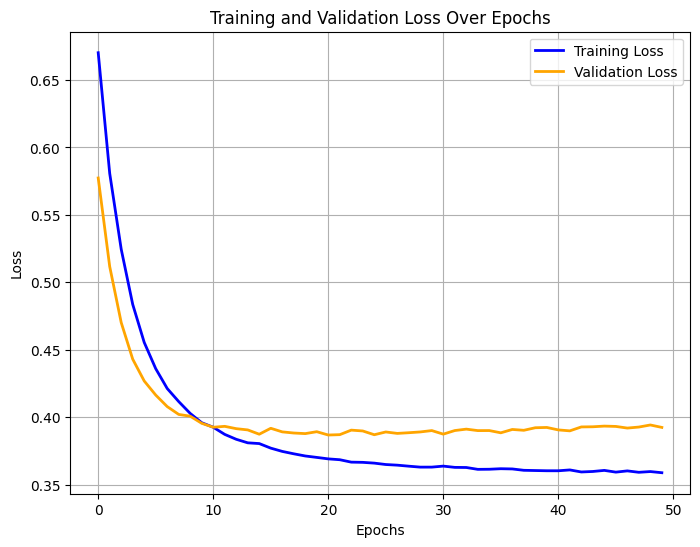

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


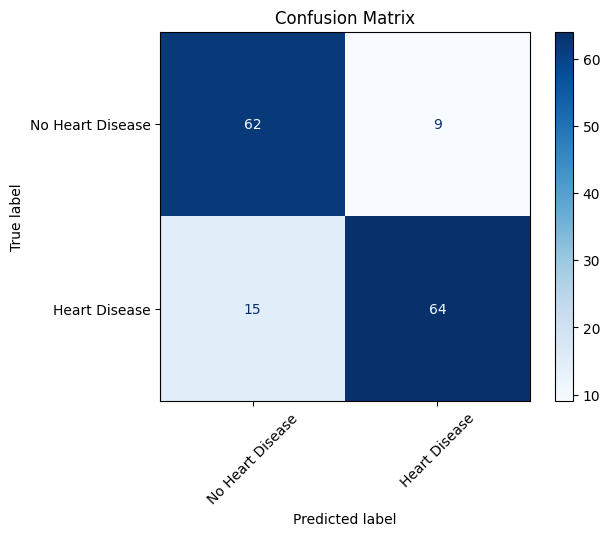

In [44]:
#Run the nural network on unbalanced data
data_new = data_preprocessed.copy()
Y_new = data_new.pop("HeartDisease")
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data_new, Y_new)
create_model(16, None, 0.001, X_train, X_val, X_test, y_train, y_val, y_test)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7640 - loss: 0.5232 - val_accuracy: 0.7522 - val_loss: 0.5120
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7956 - loss: 0.4823 - val_accuracy: 0.7652 - val_loss: 0.4964
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8049 - loss: 0.4888 - val_accuracy: 0.7696 - val_loss: 0.4807
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8161 - loss: 0.4513 - val_accuracy: 0.7696 - val_loss: 0.4737
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8096 - loss: 0.4677 - val_accuracy: 0.7826 - val_loss: 0.4637
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8123 - loss: 0.4737 - val_accuracy: 0.7739 - val_loss: 0.4634
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8461 - loss: 0.4122 - val_accuracy: 0.8130 - val_loss: 0.4553
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8242 - loss: 0.4339 - val_accuracy: 0.8174 - val_loss

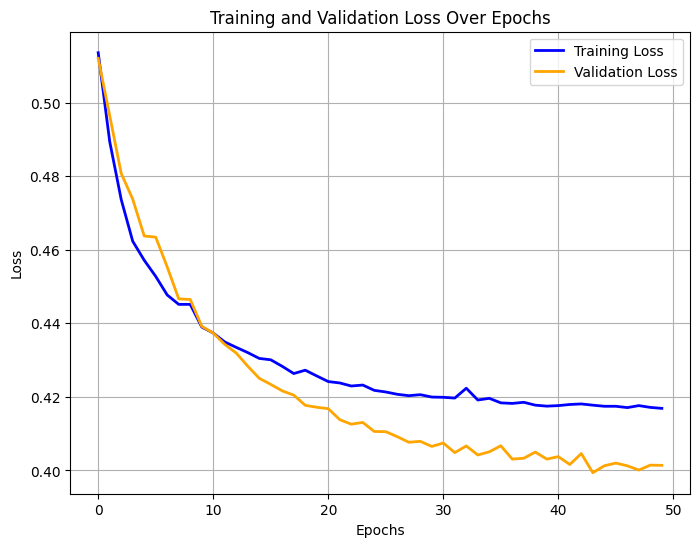

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


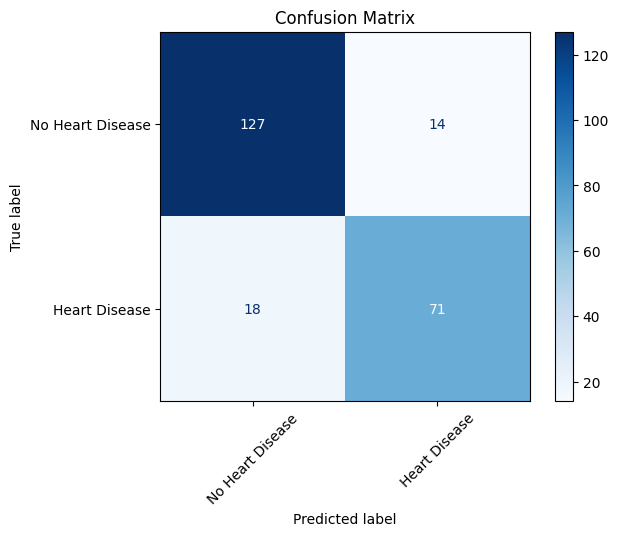

In [45]:
#Run the nural network on moderate balanced data
Y_new = data_moderate.pop("HeartDisease")
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data_moderate, Y_new)
create_model(16, None, 0.001, X_train, X_val, X_test, y_train, y_val, y_test)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4116 - loss: 0.8399 - val_accuracy: 0.5912 - val_loss: 0.7056
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6659 - loss: 0.6656 - val_accuracy: 0.7230 - val_loss: 0.6039
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7246 - loss: 0.5685 - val_accuracy: 0.7568 - val_loss: 0.5428
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7943 - loss: 0.5181 - val_accuracy: 0.7905 - val_loss: 0.5035
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8006 - loss: 0.4995 - val_accuracy: 0.8209 - val_loss: 0.4742
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8269 - loss: 0.4643 - val_accuracy: 0.8209 - val_loss: 0.4544
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8162 - loss: 0.4689 - val_accuracy: 0.8209 - val_loss: 0.4396
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8062 - loss: 0.4644 - val_accuracy: 0.8277 - val_loss

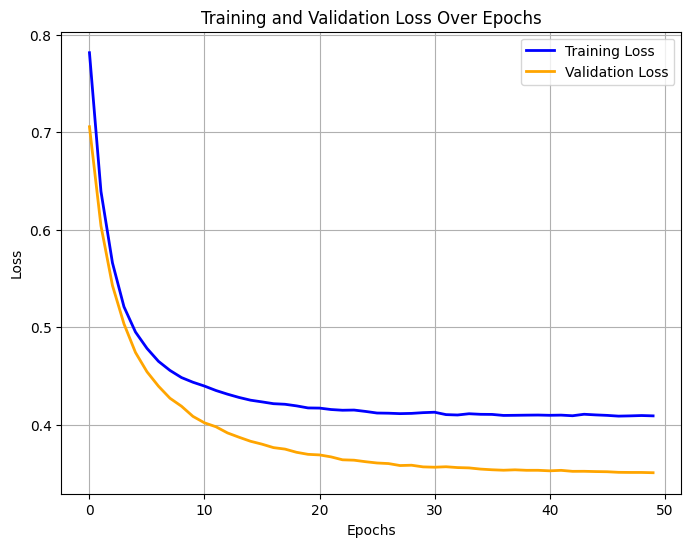

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


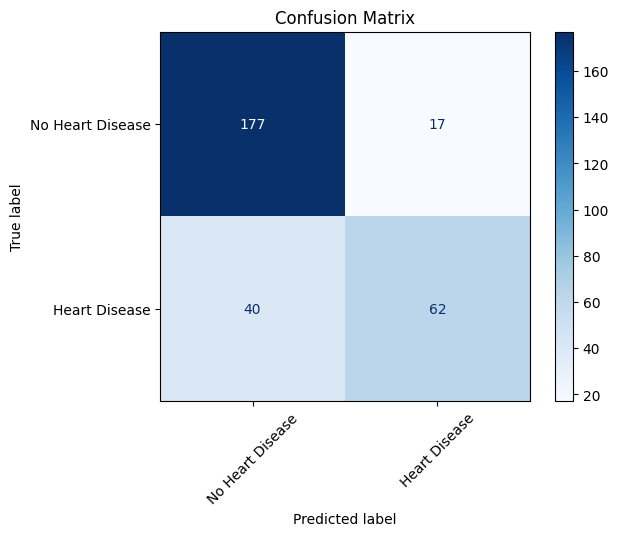

In [46]:
#Run the nural network on fully balanced data
Y_new = data_full.pop("HeartDisease")
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data_full, Y_new)
create_model(16, None, 0.001, X_train, X_val, X_test, y_train, y_val, y_test)

# PCA

In [47]:
from sklearn.decomposition import PCA

data_for_pca = data_preprocessed.copy()
Y_pca = data_for_pca.pop("HeartDisease")
# Splitting data
X_train_val, X_test, y_train_val, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
# Performing PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit and transform training data
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

Explained Variance Ratio:  [0.26049535 0.12181555 0.10737764 0.09490351 0.08683009]


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6856 - loss: 0.6279 - val_accuracy: 0.6913 - val_loss: 0.5589
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7751 - loss: 0.5241 - val_accuracy: 0.7315 - val_loss: 0.5166
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7884 - loss: 0.5008 - val_accuracy: 0.7852 - val_loss: 0.4825
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8122 - loss: 0.4711 - val_accuracy: 0.7987 - val_loss: 0.4581
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7880 - loss: 0.4627 - val_accuracy: 0.8121 - val_loss: 0.4385
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8206 - loss: 0.4130 - val_accuracy: 0.8255 - val_loss: 0.4243
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8312 - loss: 0.4137 - val_accuracy: 0.8188 - val_loss: 0.4146
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8240 - loss: 0.3975 - val_accuracy: 0.8255 - val_los

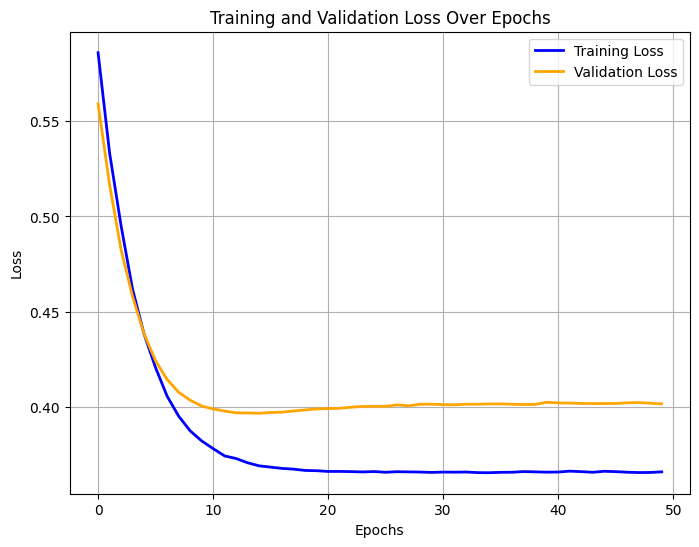

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


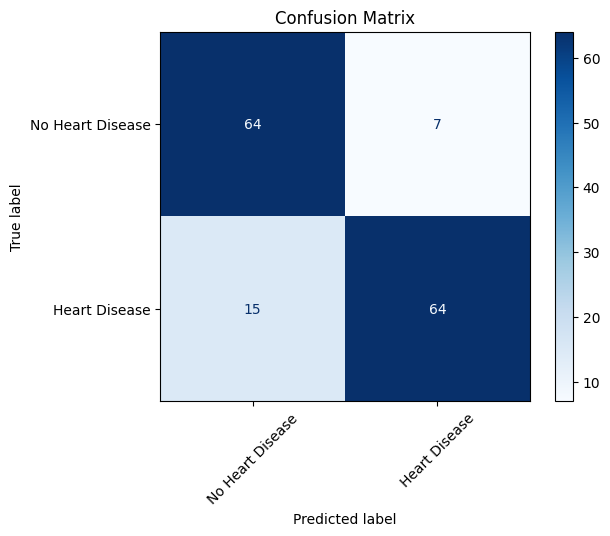

In [48]:
create_model(16, None, 0.001, X_train_pca, X_val_pca, X_test_pca, y_train, y_val, y_test)

# The End